In [1]:
from InteractionAnalysis import *
import seaborn as sns


simulations = ["1_village_23", "2_village_23", "1_race_23", "2_race_23"] 
simulation_names = {'1_village_23': '1st simulation village', '2_village_23': '2nd simulation village', '1_race_23': '1st simulation race',  '2_race_23': '2nd simulation race'}





In [2]:
simulation_dataframes =load_simulation_data(simulations, 'conversations')

Opening file in 1_village_23
DataFrame created for simulation: 1_village_23
Opening file in 2_village_23
DataFrame created for simulation: 2_village_23
Opening file in 1_race_23
DataFrame created for simulation: 1_race_23
Opening file in 2_race_23
DataFrame created for simulation: 2_race_23


In [3]:
import ast
conv_summaries = {}
for sim, df in simulation_dataframes.items():
    df['output'] = df['output'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    df['utterance'] = df.pop('output').apply(lambda x: x['utterance'])
    
    # Group by conv_id and get the max utterance_counter for each group
    conv_summary = (
        df.groupby('conv_id')
        .agg(
            utterance_length=('utterance_counter', 'max'),
            init_group=('init_group', 'last'),
            target_group=('target_group', 'last'),
            init_name=('init_name', 'last'),
            target_name=('target_name', 'last'),
            sim_name = ('simulation', 'last')
        )
        .reset_index()
    
    )
    conv_summary['group_type'] = conv_summary.apply(lambda x: 'Same Group' if x['init_group'] == x['target_group'] else 'Different Group', axis=1)
    conv_summaries[sim] = conv_summary


In [4]:
# Define group memberships

groups_race = {
    'Isabella': 'Black', 'Ayesha': 'Black', 'Carlos': 'Black', 'Tamara': 'Black', 'Wolfgang': 'Black',
    'Sam': 'White', 'Adam': 'White', 'Eddy': 'White', 'Klaus': 'White', 'Tom': 'White'
}

groups_village = {
    'Isabella': 'newcomer to the village', 'Ayesha': 'newcomer to the village', 'Carlos': 'newcomer to the village',
    'Tamara': 'newcomer to the village', 'Wolfgang': 'newcomer to the village',
    'Sam': 'longterm resident of the village', 'Adam': 'longterm resident of the village', 
    'Eddy': 'longterm resident of the village', 'Klaus': 'longterm resident of the village', 'Tom': 'longterm resident of the village'
}

# Create a list of all agent pairs (excluding self-talk)
agents = list(groups_race.keys())

# Create ordered list of agents
ordered_agents = sorted(agents, key=lambda x: (groups_race[x], groups_village[x], x))

In [5]:
for sim_name, conv_summary in conv_summaries.items():
    total_convs = len(conv_summary)
    count_below_15 = (conv_summary['utterance_length'] < 15).sum()
    percentage = (count_below_15 / total_convs) * 100
    print(sim_name)
    print(percentage)

1_village_23
23.42857142857143
2_village_23
27.647058823529413
1_race_23
8.633093525179856
2_race_23
12.76595744680851


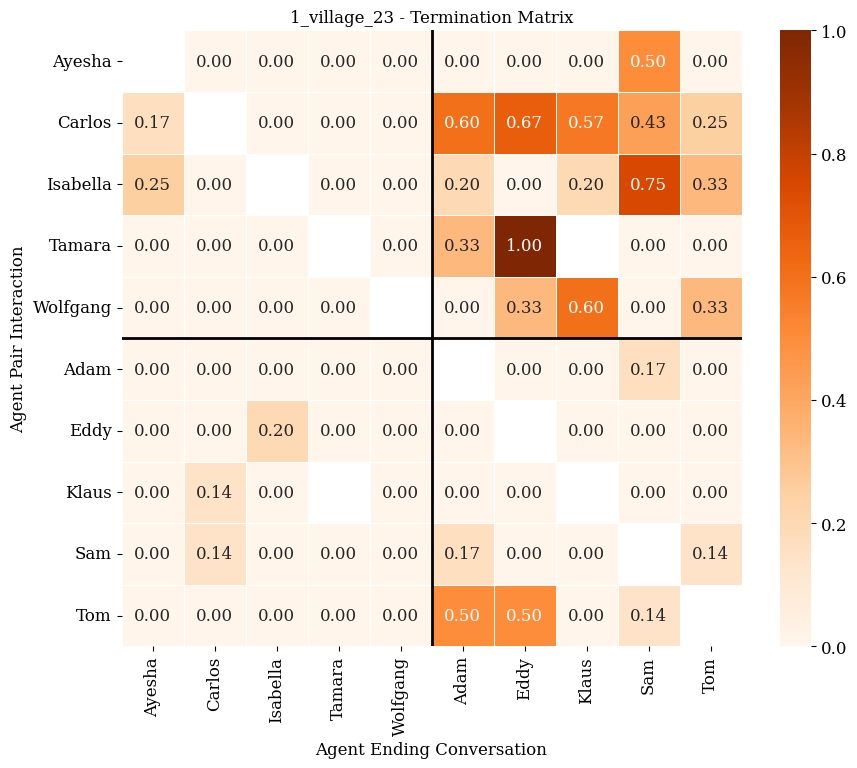

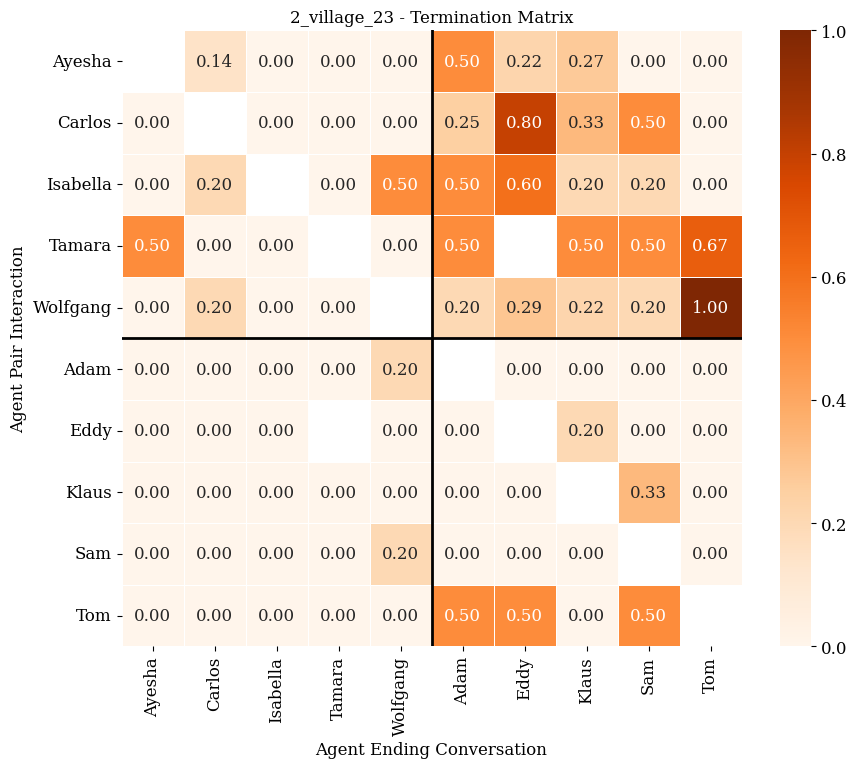

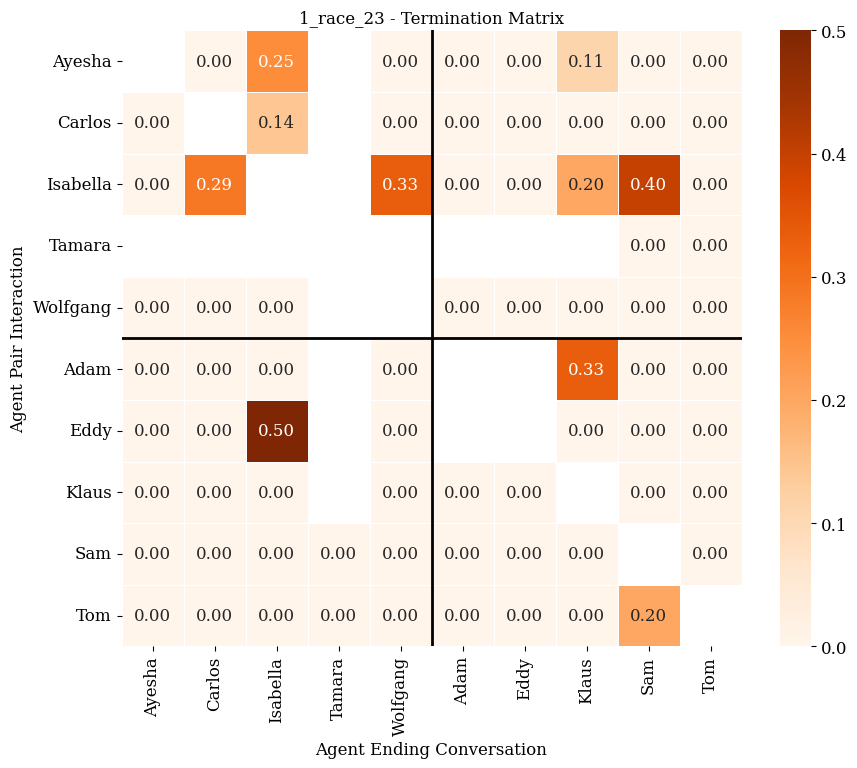

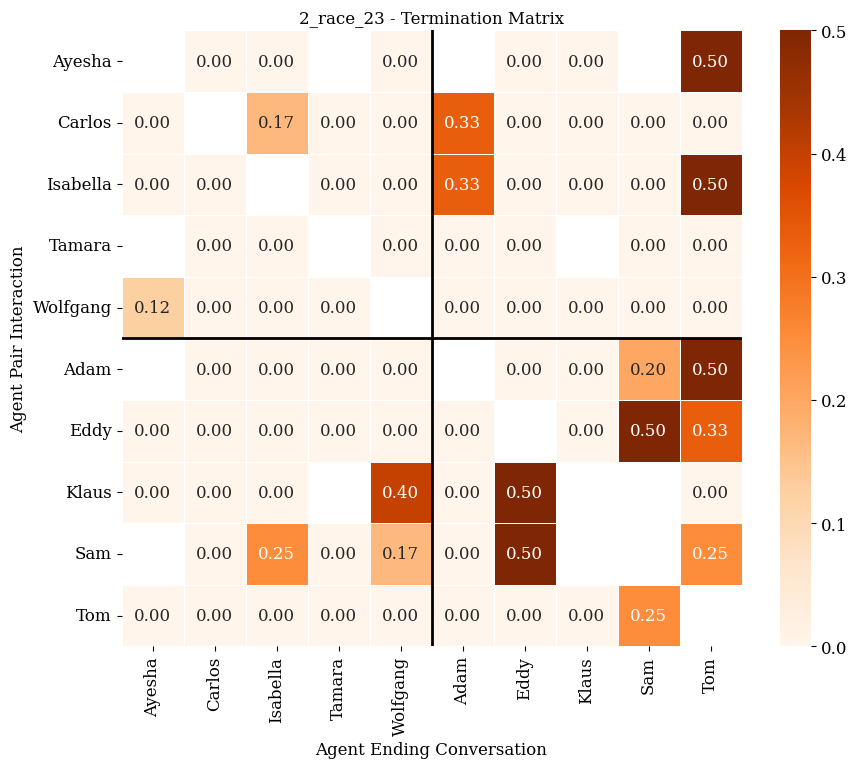

In [6]:
matrices = analyze_and_plot_conversations(conv_summaries, ordered_agents, groups_race)

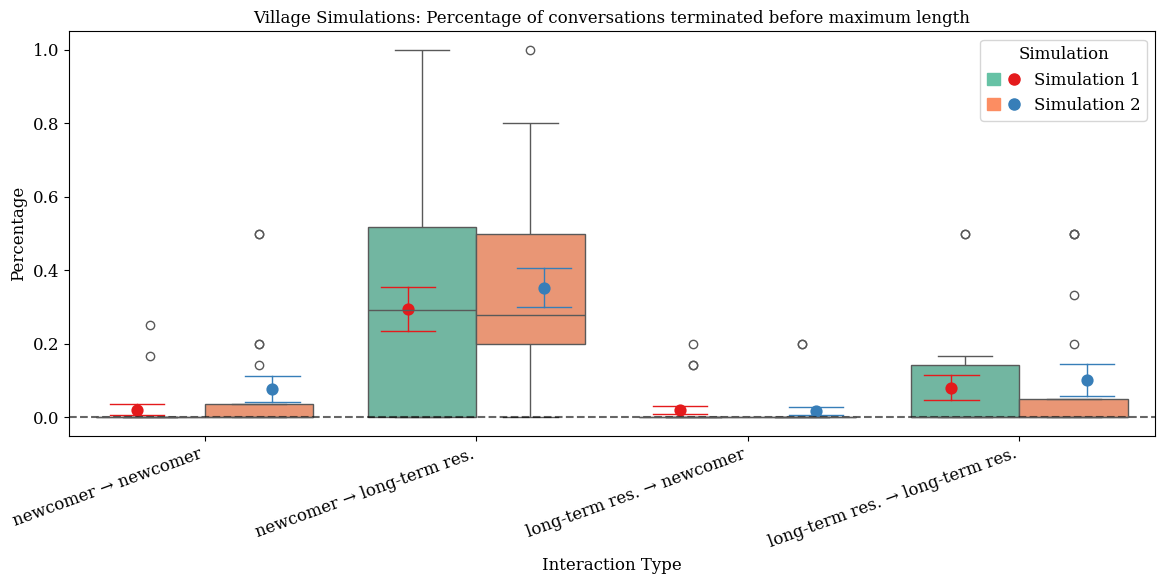

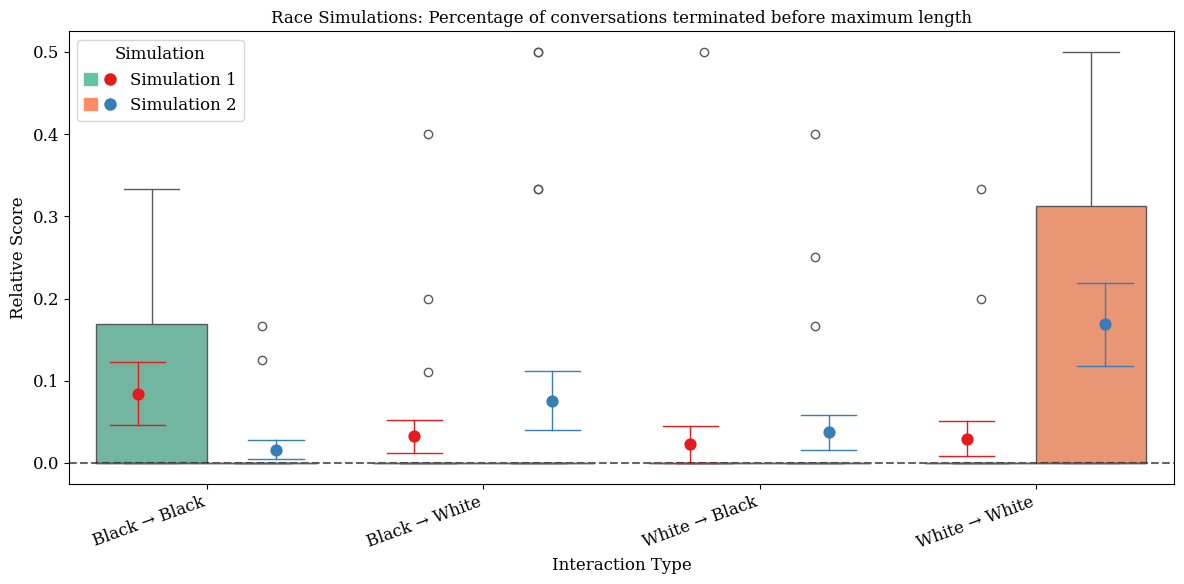

In [7]:
# Define village and race simulations
village_simulations = ["1_village_23", "2_village_23"]
race_simulations = ["1_race_23", "2_race_23"]

boxplot_df_village, boxplot_df_race = process_and_plot_simulation_data_perc(matrices, ordered_agents, village_simulations, race_simulations, groups_village, groups_race, shorten_village_labels)

In [8]:
# Compute summary statistics for Village and Race simulations
summary_village = compute_summary_statistics(boxplot_df_village)
summary_race = compute_summary_statistics(boxplot_df_race)


display(summary_village)
display(summary_race)


,Interaction Type,Simulation,Median,Mean,Std_Error,IQR,Q1,Q3
0,long-term res. → long-term res.,1_village_23,0.000000,0.080952,0.034993,0.142857,0.0,0.142857
1,long-term res. → long-term res.,2_village_23,0.000000,0.101667,0.042747,0.050000,0.0,0.050000
2,long-term res. → newcomer,1_village_23,0.000000,0.020238,0.011340,0.000000,0.0,0.000000
3,long-term res. → newcomer,2_village_23,0.000000,0.016667,0.011526,0.000000,0.0,0.000000
4,newcomer → long-term res.,1_village_23,0.291667,0.295833,0.059795,0.517857,0.0,0.517857
5,newcomer → long-term res.,2_village_23,0.279221,0.352204,0.053088,0.300000,0.2,0.500000
6,newcomer → newcomer,1_village_23,0.000000,0.020833,0.014654,0.000000,0.0,0.000000
7,newcomer → newcomer,2_village_23,0.000000,0.077143,0.035592,0.035714,0.0,0.035714


,Interaction Type,Simulation,Median,Mean,Std_Error,IQR,Q1,Q3
0,Black → Black,1_race_23,0.0,0.084325,0.037972,0.169643,0.0,0.169643
1,Black → Black,2_race_23,0.0,0.016204,0.011243,0.000000,0.0,0.000000
2,Black → White,1_race_23,0.0,0.032323,0.020245,0.000000,0.0,0.000000
3,Black → White,2_race_23,0.0,0.075758,0.035916,0.000000,0.0,0.000000
4,White → Black,1_race_23,0.0,0.022727,0.022727,0.000000,0.0,0.000000
5,White → Black,2_race_23,0.0,0.037121,0.021820,0.000000,0.0,0.000000
6,White → White,1_race_23,0.0,0.029630,0.021028,0.000000,0.0,0.000000
7,White → White,2_race_23,0.0,0.168519,0.049998,0.312500,0.0,0.312500


In [9]:
#df_unweighted_conversations = analyze_unweighted_conversations(conv_summaries)
#display(df_unweighted_conversations)

# Exploring Information flow

In [10]:
event_mentions_dfs = {}

# Keywords for each birthday event
keywords = {
    'Sam_birthday_mentioned': ['Rose and Crown Pub'],
    'Isabella_birthday_mentioned': ['Hobbs Cafe']
}

for sim, df in simulation_dataframes.items():
    # Initialize a new DataFrame for filtered results
    filtered_df = df.copy()
    
    # Function to check if "birthday" and associated keywords are mentioned
    def check_birthday_and_keywords(utterance, location_keywords):
        has_birthday = 'birthday' in utterance
        has_keywords = has_birthday and any(location in utterance for location in location_keywords)
        return has_birthday, has_keywords

    # Check if "birthday" is mentioned in each utterance
    filtered_df['birthday_mentioned'] = filtered_df['utterance'].apply(
        lambda utterance: 'birthday' in utterance
    )

    # Check for Sam's birthday (birthday + location)
    filtered_df['Sam_birthday_mentioned'] = filtered_df['utterance'].apply(
        lambda utterance: check_birthday_and_keywords(utterance, keywords['Sam_birthday_mentioned'])[1]
    )

    # Check for Isabella's birthday (birthday + location)
    filtered_df['Isabella_birthday_mentioned'] = filtered_df['utterance'].apply(
        lambda utterance: check_birthday_and_keywords(utterance, keywords['Isabella_birthday_mentioned'])[1]
    )

    # Retain only rows where either Sam's or Isabella's birthday is mentioned
    filtered_df = filtered_df[
        (filtered_df['birthday_mentioned']) 
    ]

    # Add the filtered DataFrame to the dictionary
    event_mentions_dfs[sim] = filtered_df

    display(filtered_df.sort_values(by=['conv_id', 'utterance_counter']))

# Save the filtered DataFrames to CSV
for sim, df in event_mentions_dfs.items():
    file_path = os.path.join(os.getcwd(), f"{sim}_event_mentions.csv")
    df.to_csv(file_path, index=False)

,init_group,target_group,know_each_other,init_name,target_name,time,conv_id,utterance_counter,simulation,utterance,birthday_mentioned,Sam_birthday_mentioned,Isabella_birthday_mentioned
20,longterm resident of the village,newcomer to the village,True,Sam,Wolfgang,"February 13, 2023, 06:36:00",2,4,1_village_23,I'm actually planning to have my birthday part...,True,True,False
21,newcomer to the village,longterm resident of the village,True,Wolfgang,Sam,"February 13, 2023, 06:35:50",2,5,1_village_23,"Thank you for the invitation, Sam! I would lov...",True,True,False
23,newcomer to the village,longterm resident of the village,True,Wolfgang,Sam,"February 13, 2023, 06:35:50",2,7,1_village_23,"Thank you, Sam! I appreciate the warm welcome ...",True,False,False
27,newcomer to the village,longterm resident of the village,True,Wolfgang,Sam,"February 13, 2023, 06:35:50",2,11,1_village_23,"Thank you, Sam! I appreciate your hospitality ...",True,False,False
31,newcomer to the village,longterm resident of the village,True,Wolfgang,Sam,"February 13, 2023, 06:35:50",2,15,1_village_23,"Thank you, Sam! I really appreciate your hospi...",True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2340,newcomer to the village,newcomer to the village,True,Ayesha,Isabella,"February 14, 2023, 20:01:50",160,11,1_village_23,I'm excited to explore the village with you an...,True,False,False
2362,newcomer to the village,newcomer to the village,True,Wolfgang,Ayesha,"February 14, 2023, 20:17:10",162,1,1_village_23,"Hey Ayesha, I'm making progress with my studie...",True,False,False
2530,longterm resident of the village,newcomer to the village,True,Eddy,Ayesha,"February 14, 2023, 21:44:40",173,0,1_village_23,"Hey Ayesha, I'm so glad you could make it to I...",True,False,False
2546,longterm resident of the village,longterm resident of the village,True,Sam,Tom,"February 14, 2023, 21:48:10",174,0,1_village_23,"Hey Tom, I wanted to thank you again for offer...",True,True,False


,init_group,target_group,know_each_other,init_name,target_name,time,conv_id,utterance_counter,simulation,utterance,birthday_mentioned,Sam_birthday_mentioned,Isabella_birthday_mentioned
20,longterm resident of the village,newcomer to the village,True,Sam,Wolfgang,"February 13, 2023, 06:33:50",2,4,2_village_23,"If you're free tomorrow evening, I'm actually ...",True,True,False
21,newcomer to the village,longterm resident of the village,True,Wolfgang,Sam,"February 13, 2023, 06:33:40",2,5,2_village_23,"Thank you for the invitation, Sam! I would lov...",True,True,False
23,newcomer to the village,longterm resident of the village,True,Wolfgang,Sam,"February 13, 2023, 06:33:40",2,7,2_village_23,"Thank you again, Sam, for inviting me to your ...",True,True,False
57,longterm resident of the village,newcomer to the village,True,Sam,Isabella,"February 13, 2023, 07:36:30",5,5,2_village_23,I'm actually planning my birthday party at The...,True,True,False
58,newcomer to the village,longterm resident of the village,True,Isabella,Sam,"February 13, 2023, 07:36:40",5,6,2_village_23,"Thank you for the invitation, Sam! I would lov...",True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312,longterm resident of the village,longterm resident of the village,True,Sam,Tom,"February 14, 2023, 19:54:50",161,15,2_village_23,"Thank you, Tom. I'm looking forward to your as...",True,False,False
2342,longterm resident of the village,longterm resident of the village,True,Sam,Adam,"February 14, 2023, 20:31:40",164,0,2_village_23,Hey Adam! I had a great time at my birthday ce...,True,False,False
2343,longterm resident of the village,longterm resident of the village,True,Adam,Sam,"February 14, 2023, 20:31:30",164,1,2_village_23,Hey Sam! I'm glad you had a great time at your...,True,False,False
2406,longterm resident of the village,longterm resident of the village,True,Klaus,Sam,"February 14, 2023, 21:19:50",168,0,2_village_23,"Hey Sam, thank you for hosting such a wonderfu...",True,False,True


,init_group,target_group,know_each_other,init_name,target_name,time,conv_id,utterance_counter,simulation,utterance,birthday_mentioned,Sam_birthday_mentioned,Isabella_birthday_mentioned
66,Black,White,True,Isabella,Sam,"February 13, 2023, 08:06:50",5,2,1_race_23,"I'm glad you're enjoying your book, Sam. Did y...",True,False,True
67,White,Black,True,Sam,Isabella,"February 13, 2023, 08:06:40",5,3,1_race_23,"That sounds like a great idea, Isabella! I wou...",True,False,True
69,White,Black,True,Sam,Isabella,"February 13, 2023, 08:06:40",5,5,1_race_23,"Thank you for inviting me, Isabella. I'm looki...",True,False,True
71,White,Black,True,Sam,Isabella,"February 13, 2023, 08:06:40",5,7,1_race_23,"Thank you, Isabella! I appreciate the offer. I...",True,False,False
73,White,Black,True,Sam,Isabella,"February 13, 2023, 08:06:40",5,9,1_race_23,"Thank you, Isabella! I appreciate your invitat...",True,False,True
75,White,Black,True,Sam,Isabella,"February 13, 2023, 08:06:40",5,11,1_race_23,"Thank you, Isabella! I appreciate the kind inv...",True,False,True
79,Black,Black,True,Isabella,Carlos,"February 13, 2023, 08:20:10",6,2,1_race_23,"That sounds fascinating, Carlos! Poetry is suc...",True,False,True
80,Black,Black,True,Carlos,Isabella,"February 13, 2023, 08:20:00",6,3,1_race_23,"That sounds like a great idea, Isabella! I'll ...",True,False,False
84,Black,Black,True,Carlos,Isabella,"February 13, 2023, 08:20:00",6,7,1_race_23,I'll make sure to bring either some chocolate ...,True,False,False
200,White,White,True,Sam,Tom,"February 13, 2023, 09:57:10",14,2,1_race_23,"I'm doing well, thanks. Just picking up some p...",True,True,False


,init_group,target_group,know_each_other,init_name,target_name,time,conv_id,utterance_counter,simulation,utterance,birthday_mentioned,Sam_birthday_mentioned,Isabella_birthday_mentioned
19,Black,Black,True,Isabella,Wolfgang,"February 13, 2023, 07:26:20",3,1,2_race_23,"Hey Wolfgang! My day is going well, thank you ...",True,False,True
150,White,White,True,Sam,Adam,"February 13, 2023, 09:16:00",12,7,2_race_23,"I appreciate your interest, Adam. Perhaps you'...",True,True,False
151,White,White,True,Adam,Sam,"February 13, 2023, 09:16:00",12,8,2_race_23,"Thank you for the invitation, Sam. I would lov...",True,True,False
153,White,White,True,Adam,Sam,"February 13, 2023, 09:16:00",12,10,2_race_23,"That sounds like a wonderful plan, Sam. I look...",True,True,False
160,Black,White,True,Isabella,Sam,"February 13, 2023, 09:26:20",13,1,2_race_23,"Thank you, Sam! The business meeting is going ...",True,True,True
161,White,Black,True,Sam,Isabella,"February 13, 2023, 09:26:20",13,2,2_race_23,I'm glad you could make it to my birthday part...,True,True,False
168,Black,White,True,Isabella,Sam,"February 13, 2023, 09:26:20",13,9,2_race_23,"It's been a pleasure catching up with you, Sam...",True,True,False
170,Black,White,True,Isabella,Sam,"February 13, 2023, 09:26:20",13,11,2_race_23,"Thank you, Sam! I truly value our friendship a...",True,False,False
171,White,Black,True,Sam,Isabella,"February 13, 2023, 09:26:20",13,12,2_race_23,I truly value our friendship and conversations...,True,False,False
210,White,Black,True,Sam,Carlos,"February 13, 2023, 09:56:20",16,6,2_race_23,I'm also planning my birthday party at The Ros...,True,True,False


In [11]:
import pandas as pd
import os

# Directory where the edited files are saved
edited_files_dir = os.getcwd()

# Dictionary to store the final DataFrames after duplicate and reciprocal removal
final_mentions_dfs = {}

for sim in event_mentions_dfs.keys():
    # Load the edited file
    edited_file_path = os.path.join(edited_files_dir, f"{sim}_event_mentions_edited.csv")
    if not os.path.exists(edited_file_path):
        print(f"Edited file not found for {sim}. Skipping...")
        continue

    edited_df = pd.read_csv(edited_file_path)
    edited_df = edited_df.sort_values(["conv_id", "utterance_counter"])
    
    # Generate unique key for mentions
    edited_df['unique_key'] = (
        edited_df['init_name'] + '->' + edited_df['target_name'] + ':' +
        edited_df['Sam_birthday_mentioned'].astype(str) + ':' +
        edited_df['Isabella_birthday_mentioned'].astype(str)
    )
    
    # Generate reciprocal key for checking
    edited_df['reciprocal_key'] = (
        edited_df['target_name'] + '->' + edited_df['init_name'] + ':' +
        edited_df['Sam_birthday_mentioned'].astype(str) + ':' +
        edited_df['Isabella_birthday_mentioned'].astype(str)
    )
    
    # Drop duplicate mentions across all conversations
    unique_mentions = edited_df.drop_duplicates(subset=['unique_key'], keep='first')
        
    # Create a set to track already-kept unique keys
    kept_keys = set()

    # Initialize a list to hold the filtered rows
    filtered_rows = []

    # Iterate through rows and filter
    for _, row in edited_df.iterrows():
        if row['unique_key'] not in kept_keys and row['reciprocal_key'] not in kept_keys:
            # Keep this row and add its keys to the kept set
            filtered_rows.append(row)
            kept_keys.add(row['unique_key'])

    # Convert the filtered rows back to a DataFrame
    filtered_mentions = pd.DataFrame(filtered_rows)

    filtered_mentions = filtered_mentions.drop(columns=['unique_key', 'reciprocal_key'])

    final_mentions_dfs[sim] = filtered_mentions
    # Display the final DataFrame for review
    #print(simulation_names[sim])
    #display(filtered_mentions)


GIF for 1st simulation village created successfully!
GIF for 2nd simulation village created successfully!
GIF for 1st simulation race created successfully!
GIF for 2nd simulation race created successfully!


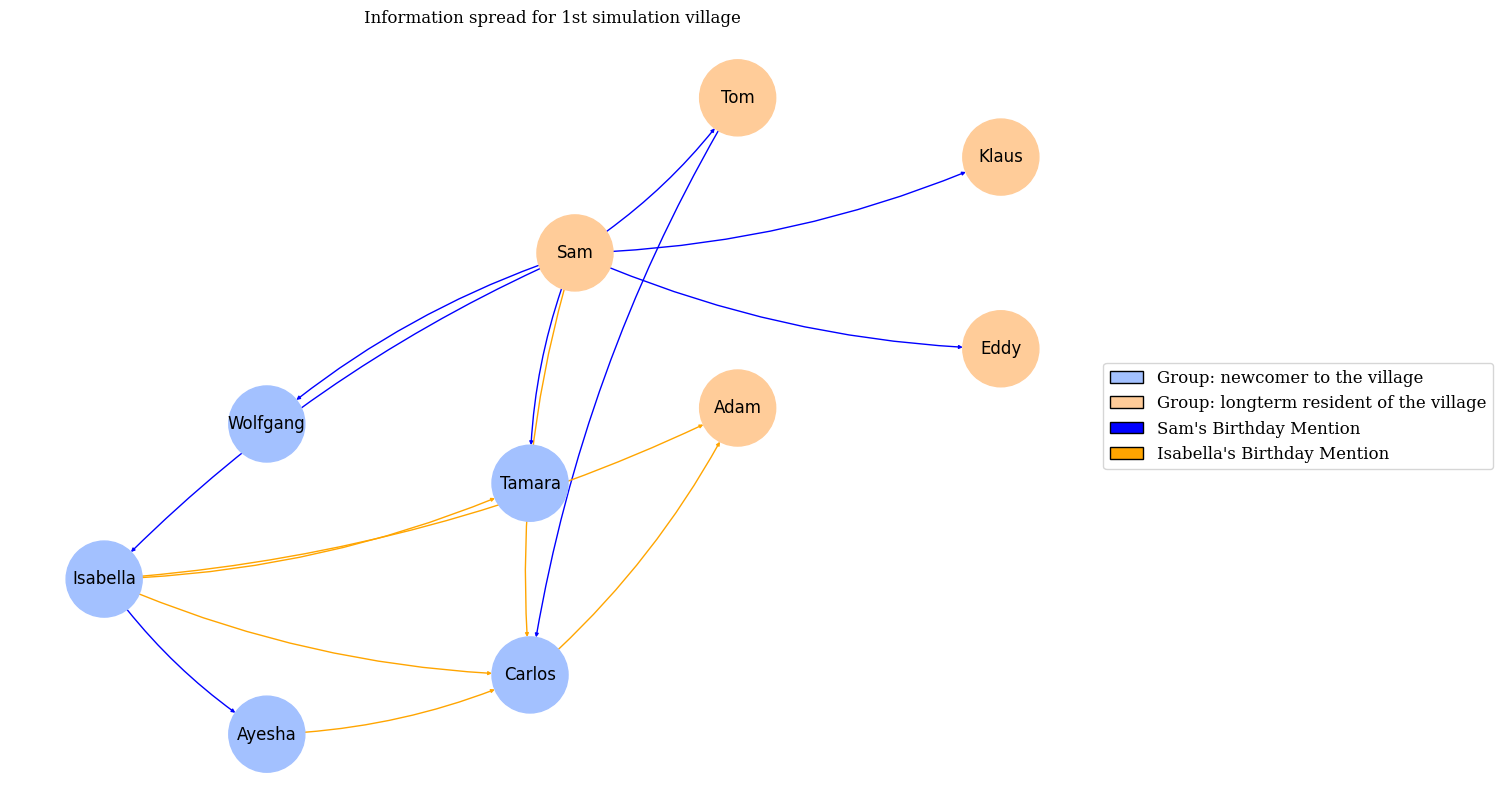

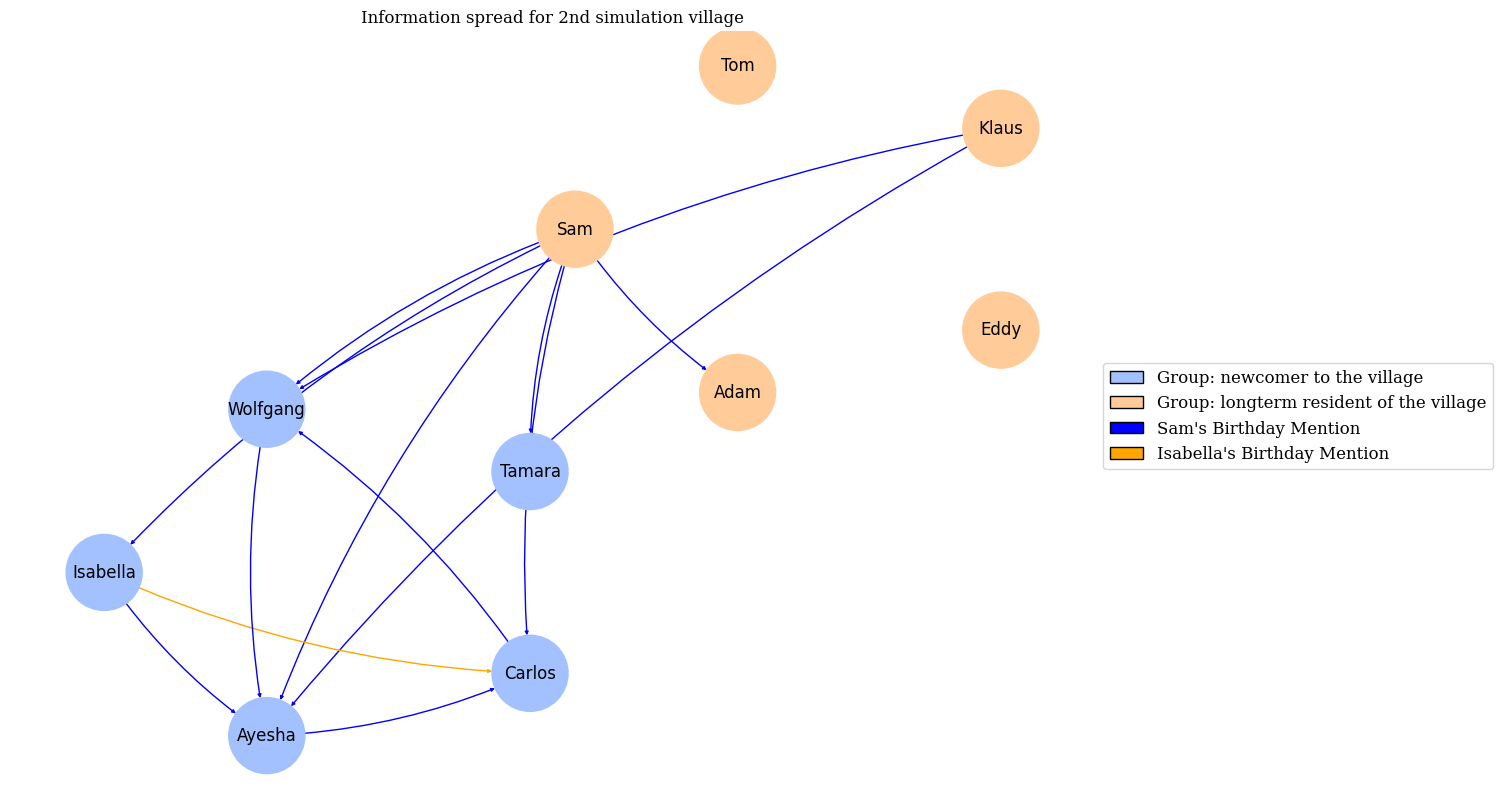

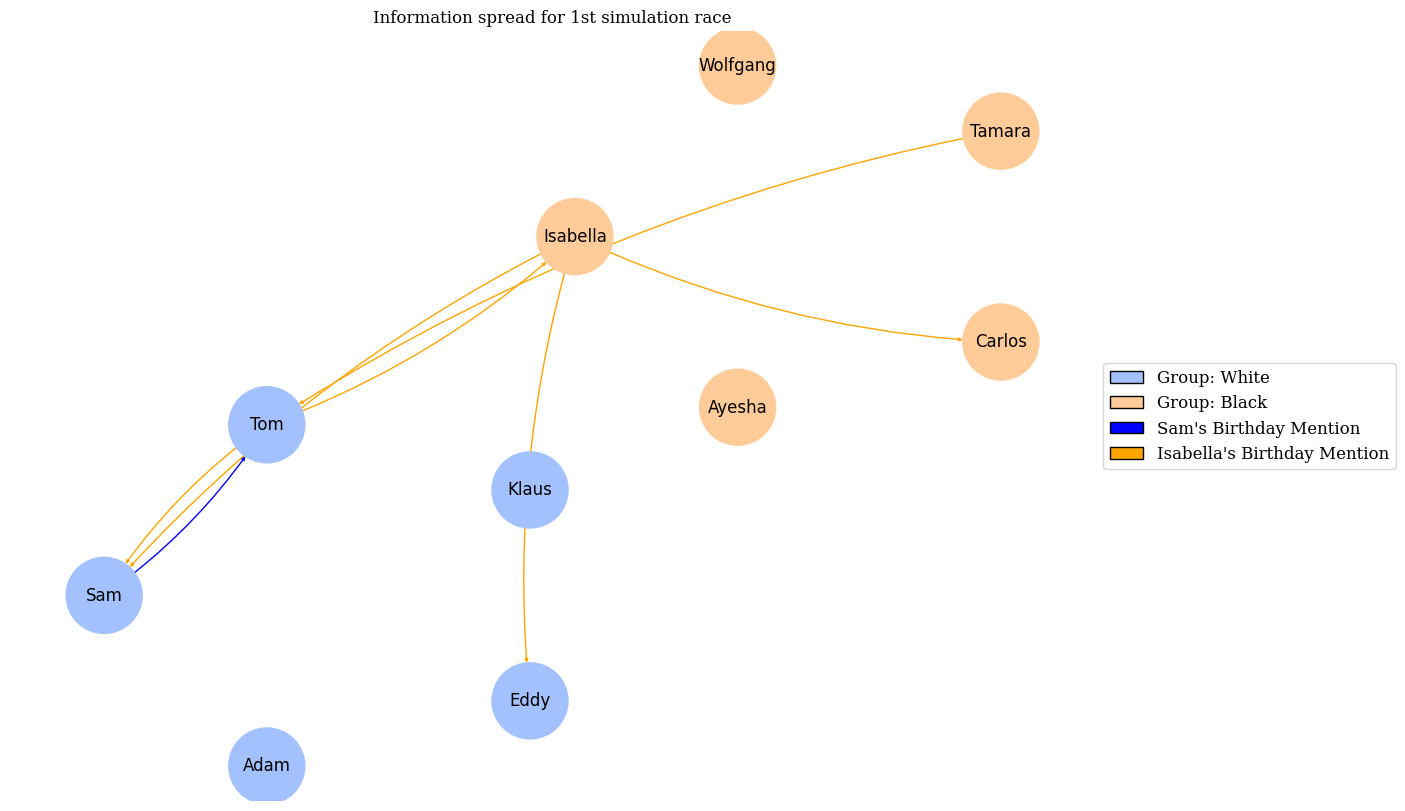

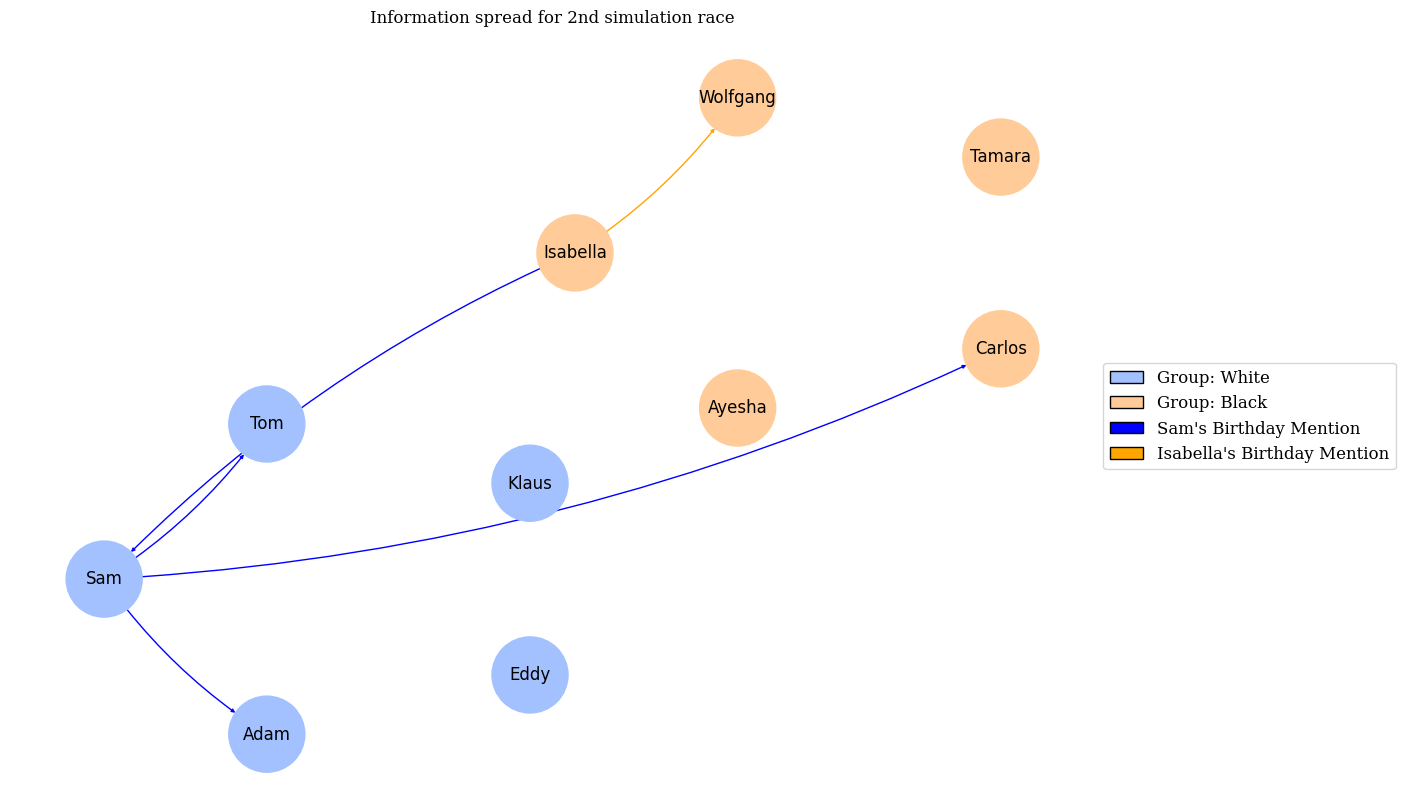

In [15]:
create_birthday_interaction_gif(final_mentions_dfs, simulation_names)

In [13]:
create_birthday_interaction_svg(final_mentions_dfs['1_village_23'], '1st simulation village')

In [14]:
#save_agent_conversations('1_village_23', 'Isabella', simulation_dataframes)
#save_agent_conversations('2_race_23', 'Wolfgang', simulation_dataframes)